# Plot Predctions in Recovery Grid

In [26]:
import stella
import matplotlib.pyplot as plt
import os
import numpy as np
from glob import glob
from tqdm import tqdm
import re

In [19]:
def get_max_around_time(file, target_time=1496.5, window_size=12):
    time = file[0]
    predictions = file[3]

    closest_time_index = np.argmin(np.abs(time - target_time))
    
    left_bound = max(0, closest_time_index - window_size)
    right_bound = min(len(predictions), closest_time_index + window_size + 1)
    
    # Get the maximum within the window

    window_max = np.max(predictions[left_bound:right_bound])
    
    # # Get the corresponding time
    window_max_index = np.argmax(predictions[left_bound:right_bound]) + left_bound
    window_max_time = time[window_max_index]

    return window_max 



In [3]:
base_dir = '../exo16'

folders = [
    f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))
]

pattern = re.compile(
    r"injected-skew_(?P<skew>-?\d+(\.\d+)?)-duration-(?P<duration>\d+\.\d+)-snr-5"
)

skew_values = sorted(
    set(int(pattern.search(f).group("skew")) for f in folders if pattern.search(f))
)
duration_values = sorted(
    set(
        float(pattern.search(f).group("duration"))
        for f in folders
        if pattern.search(f)
    )
)

In [4]:
duration_values

[0.1, 0.14, 0.19, 0.27, 0.38, 0.53, 0.74, 1.03, 1.43, 2.0]

In [5]:
skew_values

[-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]

In [6]:
skew = 2
duration = 0.53
folder_pattern = f"injected-skew_{skew}-duration-{duration:.2f}-snr-5"

In [7]:
files = glob(f'../exo16/{folder_pattern}/*.npy')
np.random.shuffle(files)

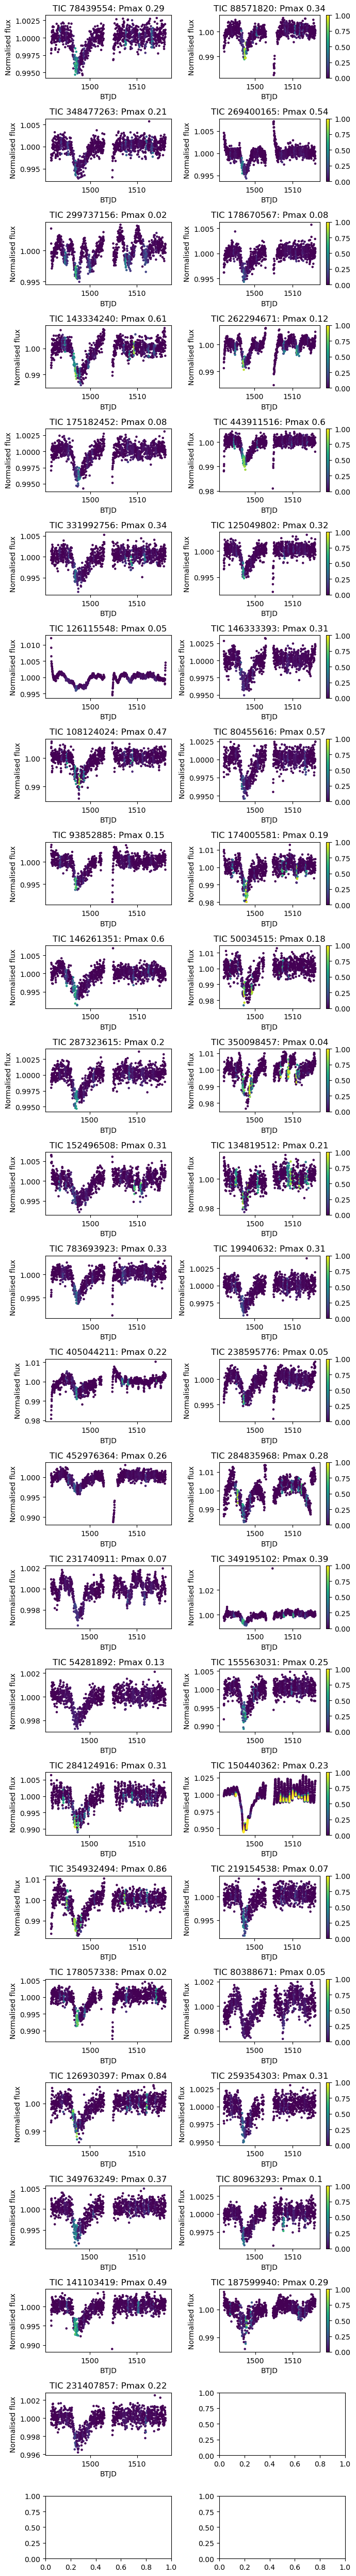

In [20]:
n_plots = 50 ## THIS HAS TO BE THE SAME AS THE ITERATIONS TO GO OVER
n_cols = 2
n_rows = (n_plots + 1) // 2  

# Create the main figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(7,2 * n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)  

p = []
for i, file_path in enumerate(files):
    file = np.load(file_path, allow_pickle=True)
    row = i // n_cols
    col = i % n_cols

    ax = axes[row, col]
    
    scatter = ax.scatter(file[0], file[1], c=file[3], vmin=0, vmax=1, s=5)
    tic = file_path.split('_')[-2]
    pred = get_max_around_time(file)
    
    accpred = 1 if pred > 0.7 else 0 # [i for i in pred if i > 0.5] ## CHECK THIS I AM NOT SURE IF IT IS CORRECT

    #rec = sum(accpred)/len(pred)
    p.append(accpred)

    ax.set_title(f'TIC {tic}: Pmax {np.round(pred,2)}')
    ax.set_xlabel('BTJD')
    ax.set_ylabel('Normalised flux')
    
    if col == n_cols - 1 or i == n_plots - 1:
        plt.colorbar(scatter, ax=ax)

    # Remove any unused subplots
    for j in range(i+1, n_rows*n_cols):
        row = j // n_cols
        col = j % n_cols
    #fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()



In [21]:
data = np.load('../exo16/injected-skew_2-duration-0.53-snr-5/exocomet_model_144416709_sector07.npy')

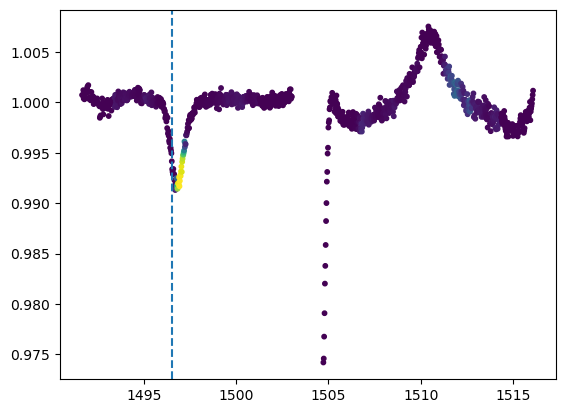

In [22]:
plt.scatter(data[0],data[1],c=data[3],s=10)
plt.axvline(1496.5,linestyle='--')

In [29]:
data2 = np.load('../exo16/injected-skew_0-duration-0.53-snr-5/exocomet_model_125142356_sector07.npy')

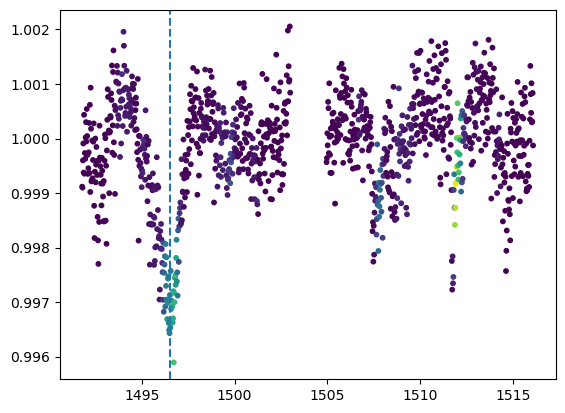

In [30]:
plt.scatter(data2[0],data2[1],c=data2[3],s=10)
plt.axvline(1496.5,linestyle='--')

Try larger SNR

In [25]:
print("Recovery rate in this bin:", sum(p)/len(p))

Recovery rate in this bin: 0.0425531914893617


## The main bulk of the code

In [15]:
skew_vals = np.arange(-7,6,1)
#duration_vals = [1.43,2.0]

recovery = []
for duration in tqdm(duration_values):
    duration_recovery = []
    for j in skew_vals:
        pred = []
        folder_pattern = f"injected-skew_{j}-duration-{duration:.2f}-snr-5"
        files = glob(f'../exo16/{folder_pattern}/*.npy')
        np.random.shuffle(files)
        
        for file_path in files:
            file = np.load(file_path, allow_pickle=True)
            val_pred = get_max_around_time(file)
            accpred = 1 if val_pred > 0.5 else 0
            pred.append(accpred)
        rec = sum(pred)/len(pred)
        duration_recovery.append(rec)
    
    recovery.append(duration_recovery)

  0%| | 0/10 [00:00<?, ?it/

1496.6201915031813
1496.6189951662714
1496.5579908415223
1496.7448322938471
1496.5762998278499
1496.7445225020892
1496.5550295424537
1496.599551034964
1496.6622619727955
1496.533391010022
1496.7445184121377
1496.7429298197655
1496.5579997346574
1496.5351075478238
1496.6197770386057
1496.5788844459773
1496.5984517344605
1496.5160436698293
1496.639613394648
1496.7239638276913
1496.5979448002433
1496.5774308942707
1496.7235299065126
1496.534733833043
1496.5360225627612
1496.5784272433762
1496.599845540943
1496.5324677118551
1496.5530994918593
1496.5992135964514
1496.7234807028399
1496.5137654848377
1496.6202610493572
1496.639273530406
1496.6604738049598
1496.575535638398
1496.7222776017925
1496.6613387437117
1496.5164446905176
1496.620610383601
1496.616663633736
1496.5338073679798
1496.6386589975743
1496.598784408466
1496.7429275185264
1496.5157433291772
1496.724428431699
1496.7452420303096
1496.7239404076035
1496.6609270918393
1496.4502960877774
1496.6402475575537
1496.5355680901903
1496

 10%| | 1/10 [00:00<00:03, 

1496.7419206344618
1496.703464617259
1496.7421020541274
1496.745475600231
1496.510284907766
1496.5146857511513
1496.6390527061747
1496.5368015548008
1496.4742941407042
1496.4942146975848
1496.5567708294564
1496.5139085822686
1496.2425848478204
1496.5331182087718
1496.5338879196474
1496.5532299617905
1496.5147473250595
1496.5161479366434
1496.5357386965331
1496.5995578924415
1496.4937337564925
1496.5142541327211
1496.5369266022585
1496.514462098553
1496.5161996071035
1496.617550750812
1496.5155490872103
1496.7226783846338
1496.5367921447667
1496.5574586572475
1496.452091040095
1496.537038702667
1496.516557400835
1496.7233728618708
1496.5555071899844
1496.5579583838332
1496.556879512078
1496.5323734010651
1496.452431513719
1496.638105470716
1496.5152745707942
1496.5346742766508
1496.5156805011113
1496.5335246243185
1496.7239361582565
1496.4952643520937
1496.4893575561039
1496.553637024499
1496.7243303440816
1496.5355782103115
1496.49367353903
1496.7442641319763
1496.5134874551889
1496.55

 20%|▏| 2/10 [00:00<00:03, 

1496.7213427603863
1496.679674233535
1496.724232816129
1496.7248037859476
1496.7237873548274
1496.723429867956
1496.7039559466757
1496.7208226167616
1496.6802292611071
1496.7030920662519
1496.742855871178
1496.6615999541084
1496.7232504412223
1496.724580464109
1496.7010166400376
1496.6992998065127
1496.7024365672598
1496.74336101486
1496.7237406339675
1496.7454643485346
1496.679562660493
1496.6811688246914
1496.6411254461482
1496.7022092337606
1496.7014372079714
1496.7438462175194
1496.7208014553303
1496.7205138189433
1496.6830073676047
1496.7038002322874
1496.7226522750864
1496.700786120752
1496.722601556107
1496.743643401578
1496.7450957376452
1496.701843878487
1496.7447571951884
1496.7233041518596
1496.6821598541017
1496.7221670954052
1496.724767098328
1496.7030933123235
1496.7430143196575
1496.721736793559
1496.703221164285
1496.7227764996621
1496.7442107065433
1496.7034289394505
1496.7241976587543
1496.7443535312896
1496.7228798698984
1496.722631852431
1496.7036269402693
1496.7450

 30%|▎| 3/10 [00:01<00:04, 

1496.7208495072323
1496.744607573607
1496.6811455262578
1496.7456537897165
1496.7440137079548
1496.7196069097065
1496.701351590166
1496.7039893599265
1496.7408671781743
1496.723865453634
1496.7403600467903
1496.7034082501107
1496.7234480480374
1496.7229568452556
1496.6998702314597
1496.7443059357993
1496.724916482687
1496.7245883924872
1496.7455741271747
1496.7439598558785
1496.7422783896936
1496.7028836001307
1496.7032110784648
1496.745472128686
1496.703113038266
1496.7236741532274
1496.7238410166283
1496.7449146555352
1496.7454108156344
1496.7233278476365
1496.7031379256568
1496.7235485549643
1496.720069279447
1496.7428664591566
1496.7032018923703
1496.7232523621444
1496.719876514923
1496.7448509992503
1496.7204680372772
1496.7224968052326
1496.7444713846546
1496.724680749379
1496.7245458605037
1496.7018865966454
1496.7190890166266
1496.7420968713284
1496.7444154850125
1496.744678934723
1496.724833770268
1496.7236461099326
1496.7014821490898
1496.74207525841
1496.7241279719353
1496.7

 40%|▍| 4/10 [00:02<00:03, 

1496.743969066474
1496.7406049001727
1496.7248865611193
1496.7456887772546
1496.7246782914165
1496.7448438735103
1496.7426452931693
1496.7451872959377
1496.7426549475138
1496.7444645311728
1496.7225762849312
1496.7450018281174
1496.7448564014064
1496.7425141502124
1496.7423574867073
1496.744034461804
1496.7456322819135
1496.745733772566
1496.7241761592643
1496.7396334217242
1496.7444154850125
1496.7411117067375
1496.745625058166
1496.7237880520902
1496.7448435033116
1496.7437454025262
1496.7211153481944
1496.7228381862008
1496.7408641607026
1496.7436644291736
1496.7448061346051
1496.7436379947187
1496.7452318892615
1496.743685233877
1496.744767389291
1496.7440893811436
1496.7440665159024
1496.7439111739232
1496.7420266999336
1496.744967964007
1496.72321872372
1496.74128997046
1496.743117942795
1496.7436735256067
1496.7450315588053
1496.740385650585
1496.7442819479631
1496.7444160523316
1496.7442589217924
1496.7446049843784
1496.7425414920285
1496.7421395856147
1496.744911882865
1496.74

 50%|▌| 5/10 [00:02<00:02, 

1496.7426549475138
1496.7453731185067
1496.7454336936996
1496.7407106903815
1496.7448882790584
1496.7439033883911
1496.7440396187794
1496.743675918875
1496.7443177703672
1496.7449319306654
1496.7431737376512
1496.7231655824037
1496.7246461031943
1496.7432677391553
1496.7452420303096
1496.7456870122153
1496.743094041577
1496.7447236166954
1496.745073281469
1496.7449031653437
1496.7200123718383
1496.7429710726242
1496.7446340125023
1496.7445921972403
1496.7407518217663
1496.7448012416346
1496.7431672469384
1496.7211418637548
1496.7432150259876
1496.7451968779335
1496.7439172287893
1496.7454410040436
1496.7444432289294
1496.721132868444
1496.7407299247109
1496.7448892535836
1496.7402431479245
1496.7439810115197
1496.7427099394831
1496.7401711851935
1496.7445008833652
1496.7456673329611
1496.7439245663898
1496.7424849456972
1496.4081400917378
1496.327131680553
1496.4324198566708
1496.4531793431515
1496.4076074197746
1496.3912653504856
1496.387307590267
1496.3913213869037
1496.3681799738874

 60%|▌| 6/10 [00:02<00:01, 

1496.431590632824
1496.3892191805035
1496.4942749586387
1496.3912612094637
1496.4703991547112
1496.450583993778
1496.328543470621
1496.4683342737353
1496.3289162480771
1496.3485692150773
1496.45363244158
1496.3908465596248
1496.5785382962015
1496.2642151931818
1496.2625633313726
1496.3080223212767
1496.4510217417892
1496.639400322495
1496.703089927041
1496.5353343897611
1496.5556212525962
1496.6807666358914
1496.3908875760924
1496.557840252123
1496.6793212037533
1496.3471284159177
1496.3696823440564
1496.6392620134961
1496.4943272078283
1496.2855884663245
1496.7444260051286
1496.641355987434
1496.493432652739
1496.3692421649916
1496.4329286215384
1496.369588662181
1496.4309179356394
1496.348114539928
1496.6770495850467
1496.573808893208
1496.741300979444
1496.3025896972586
1496.6588773059736
1496.620660738307
1496.5355761379833
1496.7238010487713
1496.7247686378494
1496.6186375461507
1496.2649433151746
1496.7247621180786
1496.471783967486
1496.7445744505258
1496.7028513776663
1496.7439

 70%|▋| 7/10 [00:03<00:01, 

1496.743915159456
1496.7431311776643
1496.7409443655065
1496.7402927464682
1496.7441190550946
1496.740385650585
1496.742435752093
1496.7432742030426
1496.741506724067
1496.7456621684184
1496.742887329596
1496.7425685548972
1496.7411561862095
1496.7450593918395
1496.2637150699534
1496.7431564359388
1496.7419798433236
1496.7443157907676
1496.7446733609042
1496.7433993695652
1496.7235372174969
1496.7434391229467
1496.7454625149564
1496.743037697115
1496.7241539208453
1496.7405023162719
1496.7221290700522
1496.7599677739863
1496.3017736413833
1496.2617716014986
1496.3876920162381
1496.3698485197083
1496.3702650171253
1496.326972474894
1496.2415269857702
1496.3703645183716
1496.3277454492068
1496.3482750270873
1496.3271689115732
1496.4112046914204
1496.3072981988742
1496.3496635171687
1496.2616943341204
1496.2865396711438
1496.3270266225677
1496.2420247499244
1496.2647195066431
1496.3913785669408
1496.286553831776
1496.451478126163
1496.2648934623073
1496.4097705630372
1496.266343414311
149

 80%|▊| 8/10 [00:03<00:00, 

1496.3699562019158
1496.7447372288825
1496.24409955138
1496.3080479560044
1496.263777272329
1496.2657213092275
1496.3485612310353
1496.3048898085601
1496.2861192309301
1496.2639303579315
1496.3075336646903
1496.3701072399765
1496.348517201959
1496.2419944760995
1496.2664121133332
1496.2664397273932
1496.3054636679512
1496.2413439364361
1496.3914950075082
1496.2431317303003
1496.724665692269
1496.2454022026284
1496.367227166007
1496.244412783589
1496.266393459826
1496.4532330903749
1496.4328285462466
1496.5995728719424
1496.6200013581997
1496.2455618992722
1496.6974771916716
1496.3884855164752
1496.5577662747914
1496.6414701207027
1496.4081462704921
1496.701985547541
1496.3288828104346
1496.5124963718608
1496.3078366018897
1496.6381894362144
1496.36808971052
1496.6819106706414
1496.3854278236086
1496.7020988327272
1496.6207792394132
1496.4329090518354
1496.4741429741455
1496.7453966642179
1496.4704000495688
1496.348611568278
1496.640353830685
1496.2647598842632
1496.49495791695
1496.431

 90%|▉| 9/10 [00:03<00:00, 

1496.3704520538956
1496.3288535140355
1496.7438462175194
1496.2645866221922
1496.283327812004
1496.239884920485
1496.492341406556
1496.3265186471522
1496.7453081716346
1496.2454760050593
1496.719984181226
1496.743526180916
1496.555704108201
1496.2439559167358
1496.4320287390285
1496.6828352737216
1496.2660384747494
1496.703715515727
1496.4952817339688
1496.3067426958798
1496.702027176883
1496.2434886944156
1496.26626796099
1496.2439007043067
1496.7418417896972
1496.2852226355762
1496.7410920665568
1496.2845128332935
1496.5555056342525
1496.24429154881
1496.2426441316284
1496.2435771182068
1496.7023923005406
1496.2454760050593
1496.7433900506041
1496.7009263483592
1496.3270269551995
1496.5561721323786
1496.4099609986051
1496.4094027149213
1496.6805810606277
1496.3064433076686
1496.7249379331365
1496.7215280038479
1496.6203355685604
1496.7248295984352
1496.7217353957947
1496.7433700446652
1496.7455701120678
1496.6157601836467
1496.2442116789498
1496.745448617376
1496.7447640622497
1496.7

100%|█| 10/10 [00:04<00:00,

1496.6194668409228
1496.745440067842
1496.3696823440564
1496.512854519033
1496.5148769231894
1496.55814641881
1496.7426780301705
1496.4304956837132
1496.7404221190845
1496.7454359488656
1496.2872919777346
1496.5984426364537
1496.7450067445232
1496.6203164207407
1496.7024755034165
1496.7015650923415
1496.7448733186086
1496.7242270288307
1496.7197320050652
1496.7192969439452
1496.26626796099
1496.535059652356
1496.3456801275377
1496.745653000351
1496.2662248201257
1496.7445788968848
1496.6371334667854
1496.4697286186376
1496.7243906808421
1496.7396484856165
1496.369010612087
1496.7232960846832
1496.6616467825388
1496.7231614795003
1496.7415467002745
1496.7453136586594
1496.745313231086
1496.2415815308445
1496.4732111582002
1496.701583508214
1496.7444160523316
1496.7429551482664
1496.7457738338999
1496.5571623160572
1496.7450585807107
1496.7247892327591
1496.7242121620864
1496.7231381930915
1496.5374103875827
1496.4479001698792
1496.2428813769338
1496.7445014315344
1496.554751430599
1496.

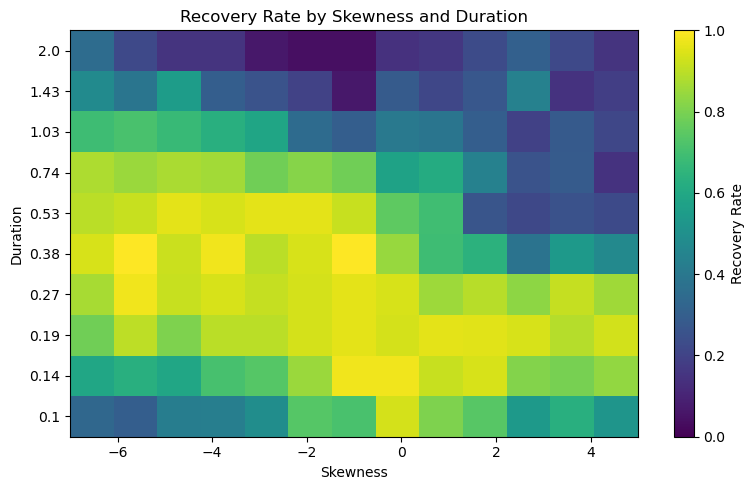

In [16]:
recovery = np.array(recovery)

fig, ax = plt.subplots(figsize=(8,5))

# Use imshow to create the 2D plot
im = ax.imshow(recovery, aspect='auto', origin='lower', 
               extent=[skew_vals[0], skew_vals[-1], -0.5, len(duration_values)-0.5],
               vmin=0, vmax=1)

# Set y-ticks at the center of each cell
ax.set_yticks(np.arange(len(duration_values)))
ax.set_yticklabels(duration_values)

# Set x-ticks at the center of each cell


# Add colorbar
cbar = plt.colorbar(im)
cbar.set_label('Recovery Rate')

# Set labels and title
ax.set_xlabel('Skewness')
ax.set_ylabel('Duration')
ax.set_title('Recovery Rate by Skewness and Duration')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

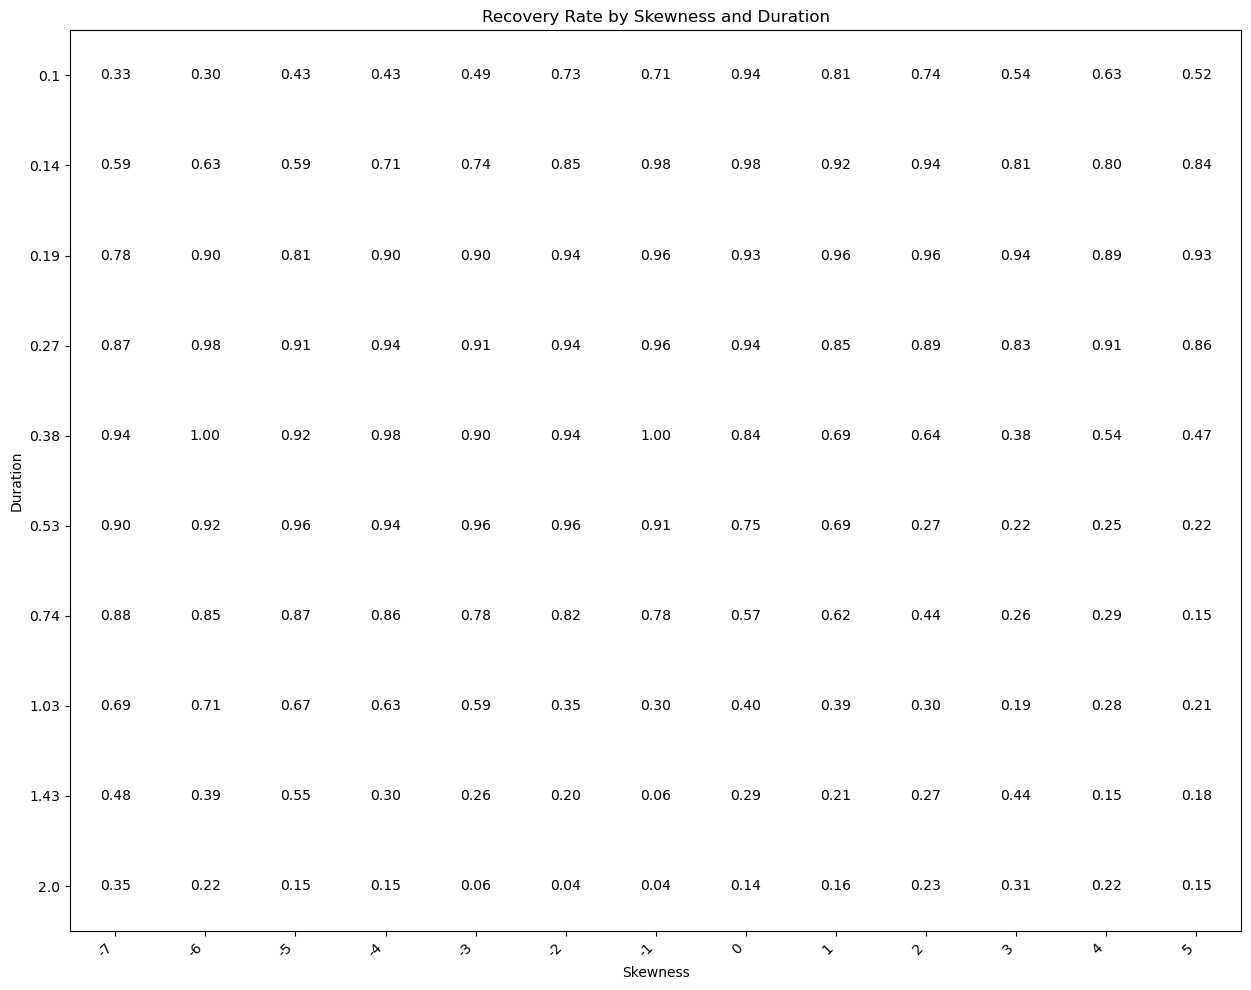

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))  # Adjust figure size as needed

# Create a blank white canvas
ax.imshow(np.ones_like(recovery), cmap='Greys', alpha=0)

# Add text annotations for each cell
for i in range(recovery.shape[0]):
    for j in range(recovery.shape[1]):
        text = ax.text(j, i, f'{recovery[i, j]:.2f}', 
                       ha='center', va='center', color='black')

# Set ticks and labels
ax.set_xticks(np.arange(len(skew_vals)))
ax.set_yticks(np.arange(len(duration_values)))
ax.set_xticklabels(skew_vals)
ax.set_yticklabels(duration_values)

# Set labels and title
ax.set_xlabel('Skewness')
ax.set_ylabel('Duration')
ax.set_title('Recovery Rate by Skewness and Duration')

# Rotate x-axis labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()


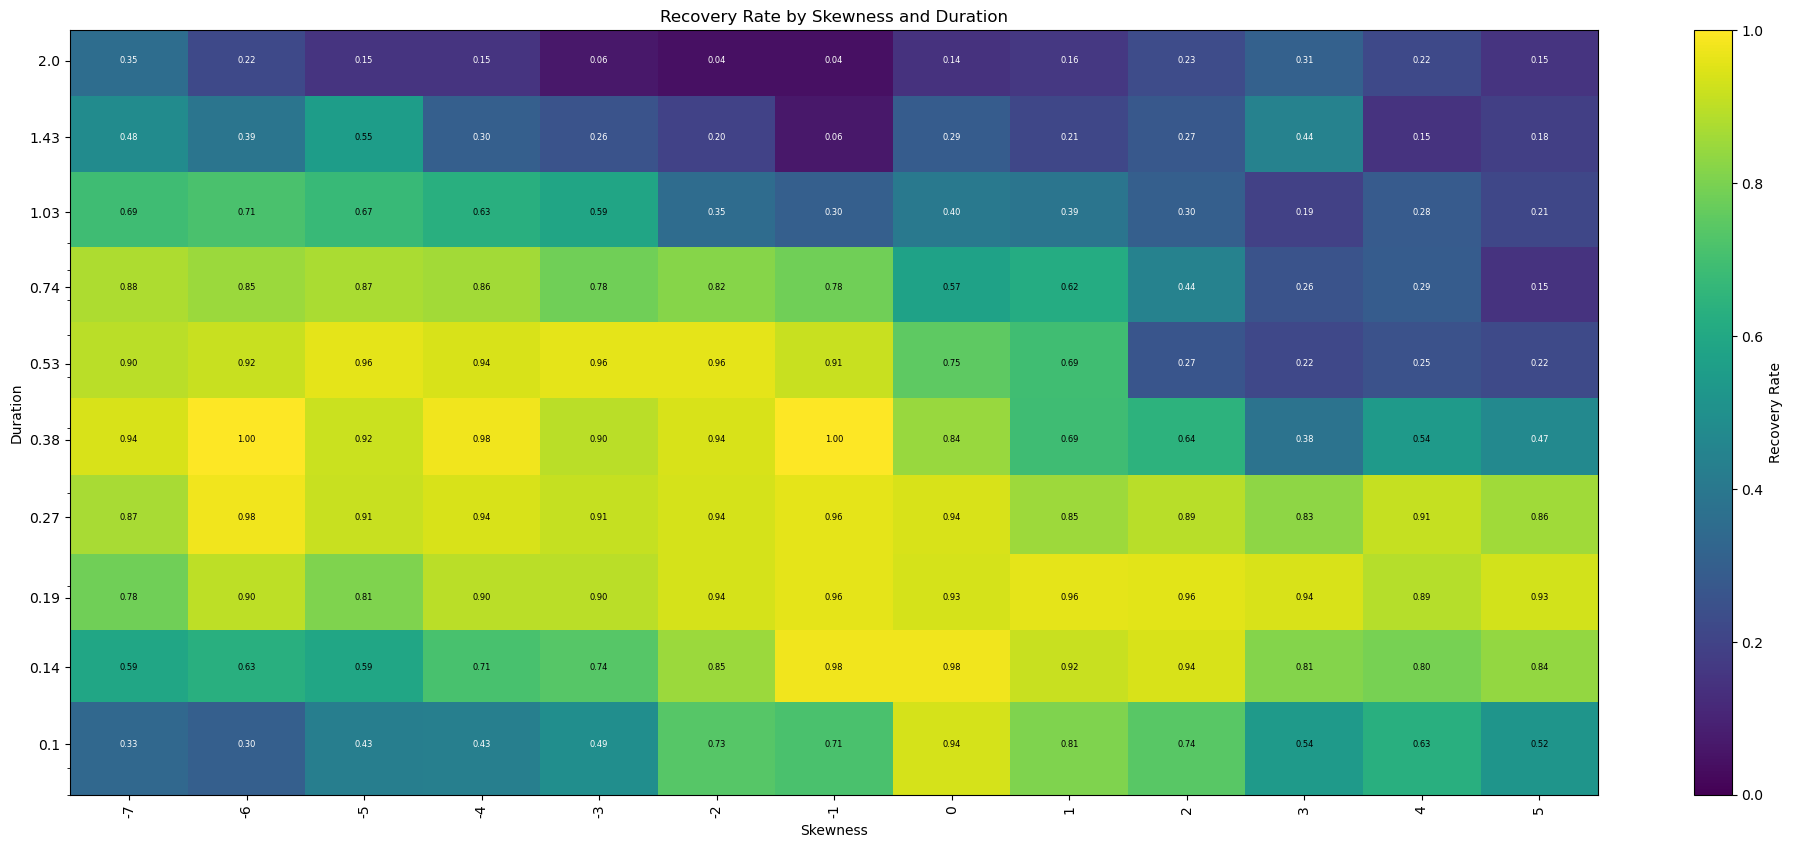

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))

# Create mesh for pcolormesh
X, Y = np.meshgrid(skew_vals, duration_values)

# Create the color plot
pcm = ax.pcolormesh(X, Y, recovery, shading='auto', vmin=0, vmax=1, cmap='viridis')

# Add text annotations for each cell
for i in range(recovery.shape[0]):
    for j in range(recovery.shape[1]):
        text_color = 'white' if recovery[i, j] < 0.5 else 'black'
        ax.text(skew_vals[j], duration_values[i], f'{recovery[i, j]:.2f}', 
                ha='center', va='center', color=text_color, fontsize=6)

# Set ticks and labels
ax.set_xticks(skew_vals)
ax.set_xticklabels(skew_vals)

# Add colorbar
cbar = plt.colorbar(pcm)
cbar.set_label('Recovery Rate')


# Set labels and title
ax.set_xlabel('Skewness')
ax.set_ylabel('Duration')
ax.set_title('Recovery Rate by Skewness and Duration')

# Rotate and align the tick labels
plt.setp(ax.get_xticklabels(), rotation=90, ha='center')
plt.setp(ax.get_yticklabels(), ha='right')

# Use a tight layout, but adjust for the rotated x-axis labels
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
ax.set_yscale('log')

ax.set_yticks(duration_values)
ax.set_yticklabels(duration_values)
# Show the plot
plt.show()

---

## Let's try the grid for one column

In [5]:
import stella
from itertools import product

In [6]:
def process_file(
    file,
    cnn,
    modelname="/Users/azib/Documents/open_source/nets2/cnn-models/ensemble_s0002_i0200_b0.7.h5",
):
    try:
        time, flux, errs, _ = np.load(file, allow_pickle=True)
        cnn.predict(modelname=modelname, times=time, fluxes=flux, errs=errs)
        ### create function to save arrays
        time = cnn.predict_time[0]
        flux = cnn.predict_flux[0]
        errs = cnn.predict_err[0]
        predictions = cnn.predictions[0]

        path_no_extenstion = os.path.splitext(file)[0]
        newfile = path_no_extenstion + "-predictions.npy"

        np.save(newfile,np.array([time,flux,errs,predictions]))


        closest_index = np.argmin(np.abs(np.array(cnn.predict_time) - 1496.5))

        ## time boundary conditions
        start_index = max(closest_index - 4, 0)
        end_index = min(closest_index + 5, len(cnn.predictions[0]))

        return 1 if np.max(cnn.predictions[0][start_index:end_index]) > 0.5 else 0
    except Exception as e:
        return 0


def process_folder(args):
    base_dir, skew, duration, cnn = args
    folder_pattern = f"injected-skew_{skew}-duration-{duration:.2f}-snr-5"
    files = glob(os.path.join(base_dir, folder_pattern, "*sector07.npy"))[0:10]

    if not files:
        return 0

    labels = [process_file(file, cnn) for file in files]
    return sum(labels) / len(labels) if labels else 0

### Read in Datasets to get `cnn`

In [7]:
exoplanets = stella.FlareDataSet(
    fn_dir="/Users/azib/Documents/open_source/nets2/models/exoplanets1k/",
    catalog="/Users/azib/Documents/open_source/nets2/catalogs/exoplanets1k.txt",
    cadences=168,
    training=0.8,
    validation=0.1,
    frac_balance=1,
)
fbinaries = stella.FlareDataSet(
    fn_dir="/Users/azib/Documents/open_source/nets2/models/binaries1k/",
    catalog="/Users/azib/Documents/open_source/nets2/catalogs/fakebinaries1k.txt",
    cadences=168,
    training=0.8,
    validation=0.1,
    frac_balance=1,
)
rbinaries = stella.FlareDataSet(
    fn_dir="/Users/azib/Documents/open_source/nets2/models/binaries-s7/",
    catalog="/Users/azib/Documents/open_source/nets2/catalogs/binaries-catalog-s7.txt",
    cadences=168,
    training=0.65,
    validation=0.1,
    frac_balance=1,
)
ds = stella.FlareDataSet(
    fn_dir="/Users/azib/Documents/open_source/nets2/models/comets5k/",
    catalog="/Users/azib/Documents/open_source/nets2/catalogs/comets.txt",
    cadences=168,
    training=0.8,
    validation=0.1,
    merge_datasets=True,
    frac_balance=0.7,
    other_datasets=[exoplanets, fbinaries, rbinaries],
    other_datasets_labels=[2, 3, 4],
    augment_portion=0.4
)

cnn = stella.ConvNN(
    output_dir="/Users/azib/Documents/open_source/nets2/cnn-models/", ds=ds
)

Reading in training set files.


100%|█|


Number of positive class training data: 799
Number of negative class training data: 0
Number of positive class validation data: 100
Number of negative class validation data: 0
Size of augmented data (training set only): 0
Class label (training): 1, Count: 799
Class label (validation): 1, Count: 100
Total size of training set: 799
Total size of validation set: 100
Total size of test set: 100
No second class to calculate imbalance.
Reading in training set files.


100%|█|


Number of positive class training data: 800
Number of negative class training data: 0
Number of positive class validation data: 100
Number of negative class validation data: 0
Size of augmented data (training set only): 0
Class label (training): 1, Count: 800
Class label (validation): 1, Count: 100
Total size of training set: 800
Total size of validation set: 100
Total size of test set: 100
No second class to calculate imbalance.
Reading in training set files.


100%|█|


Number of positive class training data: 1690
Number of negative class training data: 0
Number of positive class validation data: 260
Number of negative class validation data: 0
Size of augmented data (training set only): 0
Class label (training): 1, Count: 1690
Class label (validation): 1, Count: 260
Total size of training set: 1690
Total size of validation set: 260
Total size of test set: 650
No second class to calculate imbalance.
Reading in training set files.


100%|█|


Number of positive class training data: 4010
Number of negative class training data: 9076
Number of positive class validation data: 501
Number of negative class validation data: 934
Size of augmented data (training set only): 1604
Class label (training): 0, Count: 7472
Class label (training): 1, Count: 4010
Class label (training): 99, Count: 1604
Class label (validation): 0, Count: 482
Class label (validation): 1, Count: 501
Class label (validation): 2, Count: 83
Class label (validation): 3, Count: 97
Class label (validation): 4, Count: 272
Total size of training set: 13086
Total size of validation set: 1435
Total size of test set: 1436
Approximate class imbalance: 56.0


## Run

In [8]:
base_dir = '../exo9'

folders = [
    f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))
]

pattern = re.compile(
    r"injected-skew_(?P<skew>-?\d+(\.\d+)?)-duration-(?P<duration>\d+\.\d+)-snr-5"
)

skew_values = sorted(
    set(int(pattern.search(f).group("skew")) for f in folders if pattern.search(f))
)
duration_values = sorted(
    set(
        float(pattern.search(f).group("duration"))
        for f in folders
        if pattern.search(f)
    )
)

args_list = [
    (base_dir, skew, duration, cnn)
    for skew, duration in product(skew_values, duration_values)
]

In [29]:
result = []
for i in range(0, len(args_list), 10):
    batch = args_list[i:i+10]
    rec = []
    for item in batch:
        percent = process_folder(item)
        rec.append(percent)
    result.append(np.array(rec))

stacked_result = np.vstack(result)
final_result = stacked_result.T[::-1]

100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
  0%| |
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
  0%| |
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
  0%| |
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
  0%| |
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|
100%|█|


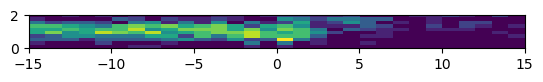

In [33]:
plt.imshow(final_result,extent=[-15,15,0,2])

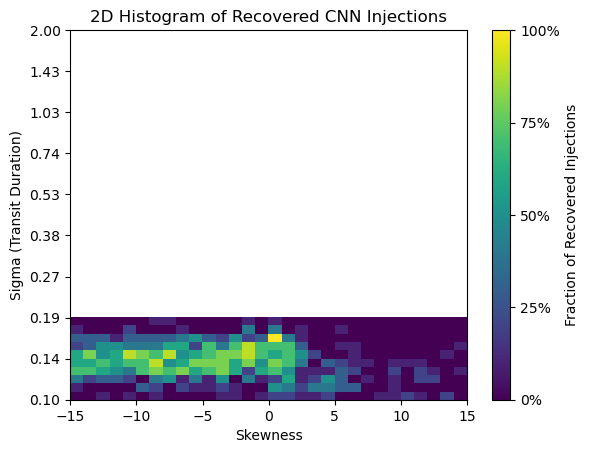

In [40]:
plt.imshow(
    final_result,
    extent=[-15,15,0,2],
    aspect="auto",
    origin="lower",
    cmap="viridis",
    vmin=0,
    vmax=1,
)
cbar = plt.colorbar(label="Fraction of Recovered Injections")
cbar.set_ticks([0, 0.25, 0.5, 0.75, 1])
cbar.set_ticklabels(["0%", "25%", "50%", "75%", "100%"])
plt.xlabel("Skewness")
plt.ylabel("Sigma (Transit Duration)")
plt.title("2D Histogram of Recovered CNN Injections")

# Adjust y-axis ticks to show actual duration values
plt.yticks(
    np.arange(len(duration_values)) + 0.5, [f"{d:.2f}" for d in duration_values]
)

plt.savefig("recovery-plot-time-and-ind-cond-all-wider-window.png", dpi=200)
plt.show()
plt.close()

In [37]:
np.array(final_result).reshape(10, 30)

array([[0. , 0. , 0.1, 0. , 0.1, 0. , 0.1, 0. , 0. , 0. , 0. , 0.1, 0.1,
        0. , 0.1, 0.2, 0.2, 0.1, 0.1, 0.2, 0. , 0. , 0. , 0.1, 0.1, 0.2,
        0.1, 0. , 0.2, 0. ],
       [0.1, 0. , 0. , 0. , 0. , 0.3, 0.2, 0. , 0.2, 0.1, 0.1, 0.2, 0.1,
        0. , 0. , 0.5, 0.4, 0.2, 0.4, 0.4, 0.3, 0.3, 0. , 0. , 0.1, 0. ,
        0. , 0. , 0. , 0. ],
       [0.4, 0.2, 0.3, 0.3, 0.2, 0. , 0.4, 0.5, 0.1, 0.4, 0.1, 0.5, 0. ,
        0.4, 0.1, 0.2, 0.6, 0.1, 0.2, 0.5, 0.3, 0. , 0.1, 0. , 0.1, 0. ,
        0.2, 0.2, 0. , 0. ],
       [0.7, 0.7, 0.6, 0.5, 0.4, 0.7, 0.8, 0.7, 0.8, 0.6, 0.7, 0.8, 0.6,
        0.2, 0.6, 0.7, 0.5, 0.1, 0.1, 0.1, 0.3, 0.2, 0. , 0. , 0.2, 0. ,
        0.2, 0.1, 0. , 0.1],
       [0.6, 0.6, 0.7, 0.6, 0.7, 0.7, 0.9, 0.5, 0.6, 0.8, 0.8, 0.8, 0.6,
        0.8, 0.5, 0.8, 0.7, 0.4, 0. , 0.3, 0.2, 0.1, 0.1, 0. , 0.1, 0.1,
        0.1, 0. , 0. , 0. ],
       [0.6, 0.8, 0.5, 0.6, 0.9, 0.8, 0.7, 0.9, 0.5, 0.6, 0.7, 0.8, 0.8,
        0.9, 0.7, 0.6, 0.7, 0.5, 0.2, 0. , 0. , 0.1,

In [41]:
final_result

array([[0. , 0. , 0.1, 0. , 0.1, 0. , 0.1, 0. , 0. , 0. , 0. , 0.1, 0.1,
        0. , 0.1, 0.2, 0.2, 0.1, 0.1, 0.2, 0. , 0. , 0. , 0.1, 0.1, 0.2,
        0.1, 0. , 0.2, 0. ],
       [0.1, 0. , 0. , 0. , 0. , 0.3, 0.2, 0. , 0.2, 0.1, 0.1, 0.2, 0.1,
        0. , 0. , 0.5, 0.4, 0.2, 0.4, 0.4, 0.3, 0.3, 0. , 0. , 0.1, 0. ,
        0. , 0. , 0. , 0. ],
       [0.4, 0.2, 0.3, 0.3, 0.2, 0. , 0.4, 0.5, 0.1, 0.4, 0.1, 0.5, 0. ,
        0.4, 0.1, 0.2, 0.6, 0.1, 0.2, 0.5, 0.3, 0. , 0.1, 0. , 0.1, 0. ,
        0.2, 0.2, 0. , 0. ],
       [0.7, 0.7, 0.6, 0.5, 0.4, 0.7, 0.8, 0.7, 0.8, 0.6, 0.7, 0.8, 0.6,
        0.2, 0.6, 0.7, 0.5, 0.1, 0.1, 0.1, 0.3, 0.2, 0. , 0. , 0.2, 0. ,
        0.2, 0.1, 0. , 0.1],
       [0.6, 0.6, 0.7, 0.6, 0.7, 0.7, 0.9, 0.5, 0.6, 0.8, 0.8, 0.8, 0.6,
        0.8, 0.5, 0.8, 0.7, 0.4, 0. , 0.3, 0.2, 0.1, 0.1, 0. , 0.1, 0.1,
        0.1, 0. , 0. , 0. ],
       [0.6, 0.8, 0.5, 0.6, 0.9, 0.8, 0.7, 0.9, 0.5, 0.6, 0.7, 0.8, 0.8,
        0.9, 0.7, 0.6, 0.7, 0.5, 0.2, 0. , 0. , 0.1,

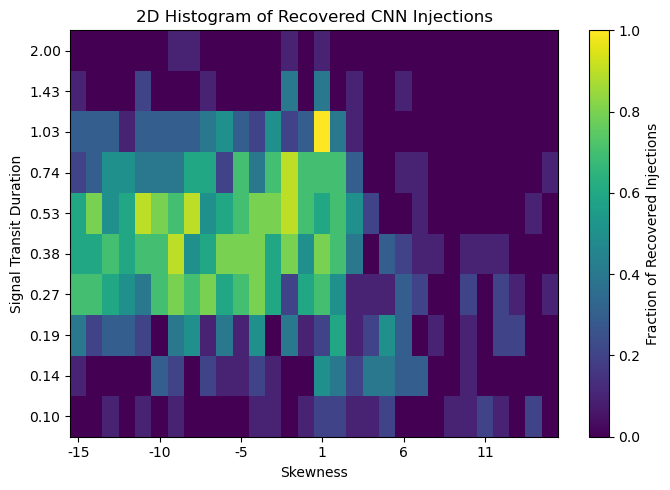

In [44]:
plt.figure(figsize=(7,5))
plt.imshow(final_result, cmap='viridis', aspect='auto', origin='lower')
plt.colorbar(label='Fraction of Recovered Injections')

# Set labels and title
plt.xlabel('Skewness')
plt.ylabel('Signal Transit Duration')
plt.title('2D Histogram of Recovered CNN Injections')

# Adjust y-axis ticks to show actual duration values
duration_values = [0.10, 0.14, 0.19, 0.27, 0.38, 0.53, 0.74, 1.03, 1.43, 2.00]
plt.yticks(range(len(duration_values)), [f'{d:.2f}' for d in duration_values])

# Adjust x-axis ticks
skewness_values = np.linspace(-15, 15, 30)
plt.xticks(np.arange(0, 30, 5), [f'{s:.0f}' for s in skewness_values[::5]])

plt.tight_layout()
plt.show()

In [52]:
final_result > 0.85

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False,